In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg

In [2]:
# url = 'https://www.lostarkmarket.online/api/export-item-history/North America West/achatemeow-selection-chest-3,achatemeow-selection-chest-3,armor-wagon-selection-chest-4,bike-mount-selection-chest-4,blue-crystal-0?format=csv'
# res = requests.get(url)
# res.text

In [3]:
import time
def create_item_ids_csv():
    list_url = "https://www.lostarkmarket.online/api/export-market-live/North America East?categories=Gem Chest,Mount,Currency Exchange,Skin,Cooking?format=csv"
    res = requests.get(list_url)
    time.sleep(5)
    two_url = "https://www.lostarkmarket.online/api/export-market-live/North America East?categories=Enhancement Material,Trader,Engraving Recipe,Combat Supplies,Adventurer's Tome,Cooking?format=csv"
    restwo = requests.get(two_url)

    part_one = str(res.text)
    part_two = str(restwo.text)
    # remove the ending and starting brackets to join as 1 obj
    big_res = part_one[:-1] + ',' + part_two[1:]

    item_ids = []
    for x in big_res[1:][:-1].split(','):
        if '{"id":"' in x:
            value = x.split('{"id":')[1].replace('"','')
            item_ids.append(value)
    pd.DataFrame(item_ids,columns=['item_id']).to_csv('item_ids.csv')
    return item_ids

In [4]:
item_ids = create_item_ids_csv()

In [5]:
#@TODO only pull the IDS and then parse that data to a dictionary, to then send to api calls to get the historical records.
# can do many IDS at once with historical.

In [ ]:
url_base = 'https://www.lostarkmarket.online/api/export-item-history/North America East/'
query_size = 5 # edit the URL if you adjust this number
remainder = len(item_ids)%query_size
sections = remainder/query_size
df_frame = []

# get the main grouping of items
print(f'Starting final 0/{len(item_ids)}')
for i in range(int(len(item_ids[:-remainder])/query_size)):
    #pirnt a status value
    if i%query_size == 0:
        print(f'{i}/{int(len(item_ids[:-remainder])/query_size)}')
    list_url = f"{url_base}\
{item_ids[int((sections*0)+i)]},\
{item_ids[int((sections*1)+i)]},\
{item_ids[int((sections*2)+i)]},\
{item_ids[int((sections*3)+i)]},\
{item_ids[int((sections*4)+i)]}?format=csv"
    try:
        res = requests.get(list_url)
        for x in res.text.split('\n'):
            x = x.split(',')
            df_frame.append(x)
        time.sleep(5)
    except:
        print(f'BAD URL FOUND: {list_url}')
        continue
    
# don't forget the remainding items
print(f'Starting final {remainder}')
for i in range(int(len(item_ids[-remainder:]))):
    print(f'Starting {i}/{remainder}')
    list_url = f"{url_base}{item_ids[i]}?format=csv"
    try:
        res = requests.get(list_url)
        for x in res.text.split('\n'):
            x = x.split(',')
            df_frame.append(x)
        time.sleep(5)
    except:
        print(f'BAD URL FOUND: {list_url}')
        continue

0/126
5/126
BAD URL FOUND: https://www.lostarkmarket.online/api/export-item-history/North America West/icebloom-reindeer-selection-chest-3,icebloom-reindeer-selection-chest-3,magic-bed-mount-selection-chest-3,mount-cerberus-4,mount-chaos-ghost-horse-4?format=csv
10/126
15/126
20/126


In [991]:
url = 'https://www.lostarkmarket.online/api/export-item-history/North America East/fish-0?format=csv'
res = requests.get(url)
for x in res.text.split('\n'):
    x = x.split(',')
    df_frame.append(x)

In [992]:
df = pd.DataFrame(df_frame)
df.to_csv('raw.csv')

In [993]:
df.columns = df.iloc[0]
df = df.iloc[1:]

In [994]:
removed_quote_columns = []
for x in list(df.columns):
    x = x.replace('"','')
    removed_quote_columns.append(x)
df.columns = removed_quote_columns

In [995]:
df = df[df['open'].str.contains('[A-Za-z]') == False]
df = df[df['close'].str.contains('[A-Za-z]') == False]
df = df[df['high'].str.contains('[A-Za-z]') == False]
df = df[df['low'].str.contains('[A-Za-z]') == False]
df = df[df.open != '']
df = df[df.close != '']
df = df[df.high != '']
df = df[df.low != '']
df = df[df.open != 0]
df = df[df.close != 0]
df = df[df.high != 0]
df = df[df.low != 0]

In [996]:
df[[ 'open', 'close', 'high', 'low']] = df[[ 'open', 'close', 'high', 'low']].astype('float')
df.to_csv('clean_raw_timestamp.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'].astype('int64'),unit='ms')
df.to_csv('clean_db.csv')

In [809]:
df[df['id']=='"honor-shard-pouch-l-3"']

,id,timestamp,open,close,high,low
2624859,"""honor-shard-pouch-l-3""",2022-04-25 10:00:00,68.00,68.00,68.00,68.00
2624860,"""honor-shard-pouch-l-3""",2022-04-25 11:00:00,68.00,67.94,68.00,67.94
2624861,"""honor-shard-pouch-l-3""",2022-04-25 12:00:00,67.94,67.88,67.94,67.88
2624862,"""honor-shard-pouch-l-3""",2022-04-25 13:00:00,67.88,67.83,67.88,67.83
2624863,"""honor-shard-pouch-l-3""",2022-04-25 14:00:00,67.83,67.77,67.83,67.77
...,...,...,...,...,...,...
2639301,"""honor-shard-pouch-l-3""",2023-02-17 22:00:00,686.38,684.25,686.38,684.25
2639302,"""honor-shard-pouch-l-3""",2023-02-17 23:00:00,684.25,682.13,684.25,682.13
2639303,"""honor-shard-pouch-l-3""",2023-02-18 00:00:00,682.13,680.00,682.13,680.00
2639304,"""honor-shard-pouch-l-3""",2023-02-18 01:00:00,680.00,680.00,680.00,680.00


In [997]:
one_item_parse = df[df['id']=='"fish-0"']
# get the last two months of data.
recent_one_item = one_item_parse[one_item_parse.timestamp > datetime.now() - relativedelta(months=1)]

# set timestamp to be the axis
recent_one_item.index = recent_one_item.timestamp
recent_one_item.sort_index(inplace=True)
recent_one_item.drop('timestamp',axis = 1, inplace= True)

# remove outliers
from scipy import stats
recent_one_item = recent_one_item[(np.abs(stats.zscore(recent_one_item.close)) < 2.65)]
recent_one_item = recent_one_item[stats.zscore(recent_one_item.close) > -1]

C:\Users\saber\AppData\Local\Temp\ipykernel_9424\231996382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_one_item.sort_index(inplace=True)
C:\Users\saber\AppData\Local\Temp\ipykernel_9424\231996382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_one_item.drop('timestamp',axis = 1, inplace= True)


In [999]:
recent_one_item

,id,open,close,high,low
timestamp,,,,,
2023-01-21 15:00:00,"""fish-0""",49.63,49.68,49.68,49.63
2023-01-21 15:00:00,"""fish-0""",49.63,49.68,49.68,49.63
2023-01-21 16:00:00,"""fish-0""",49.68,49.74,49.74,49.68
2023-01-21 16:00:00,"""fish-0""",49.68,49.74,49.74,49.68
2023-01-21 17:00:00,"""fish-0""",49.74,49.79,49.79,49.74
...,...,...,...,...,...
2023-02-16 01:00:00,"""fish-0""",35.00,35.00,35.00,35.00
2023-02-16 02:00:00,"""fish-0""",35.00,34.50,35.00,34.50
2023-02-16 02:00:00,"""fish-0""",35.00,34.50,35.00,34.50


In [1000]:
sma = recent_one_item[recent_one_item.close < 730.00]

In [1001]:
sma = sma[['close']]
# sma.plot(figsize=(15,8))
window = 5
sma = sma.rolling(window=window).median()[window-1:]#.pct_change()[window:]

<AxesSubplot:xlabel='timestamp'>

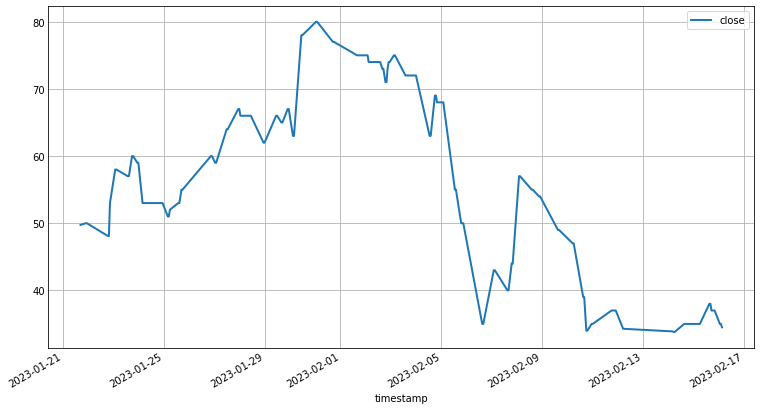

In [1002]:
sma.plot(figsize=(10,6),lw=2)

In [1003]:
sma

,close
timestamp,
2023-01-21 17:00:00,49.74
2023-01-21 17:00:00,49.74
2023-01-21 18:00:00,49.79
2023-01-21 18:00:00,49.79
2023-01-21 19:00:00,49.84
...,...
2023-02-16 01:00:00,35.00
2023-02-16 02:00:00,35.00
2023-02-16 02:00:00,35.00


In [1068]:
import pingouin as pg

pg.partial_corr(data=one_item_parse, x='timestamp', y='open', covar='id')

AssertionError: 

,id,timestamp,open,close,high,low
2639307,"""fish-0""",2022-04-20 20:00:00,10.0,10.0,10.0,10.0
2639308,"""fish-0""",2022-04-20 21:00:00,11.0,11.0,11.0,11.0
2639309,"""fish-0""",2022-04-20 22:00:00,11.0,10.5,11.0,10.5
2639310,"""fish-0""",2022-04-20 23:00:00,10.5,10.0,10.5,10.0
2639311,"""fish-0""",2022-04-21 00:00:00,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...
2654003,"""fish-0""",2023-02-20 21:00:00,27.0,27.0,27.0,27.0
2654004,"""fish-0""",2023-02-20 22:00:00,27.0,27.0,27.0,27.0
2654005,"""fish-0""",2023-02-20 23:00:00,27.0,27.0,27.0,27.0
2654006,"""fish-0""",2023-02-21 00:00:00,27.0,27.0,27.0,27.0


In [1027]:
# last 45 days of record peering
records_to_grab = 45*24
day_of_the_week = one_item_parse[-records_to_grab:]
day_of_the_week.timestamp = day_of_the_week.timestamp.dt.day_name()

C:\Users\saber\AppData\Local\Temp\ipykernel_9424\3278005194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_of_the_week.timestamp = day_of_the_week.timestamp.dt.day_name()


<AxesSubplot:xlabel='timestamp'>

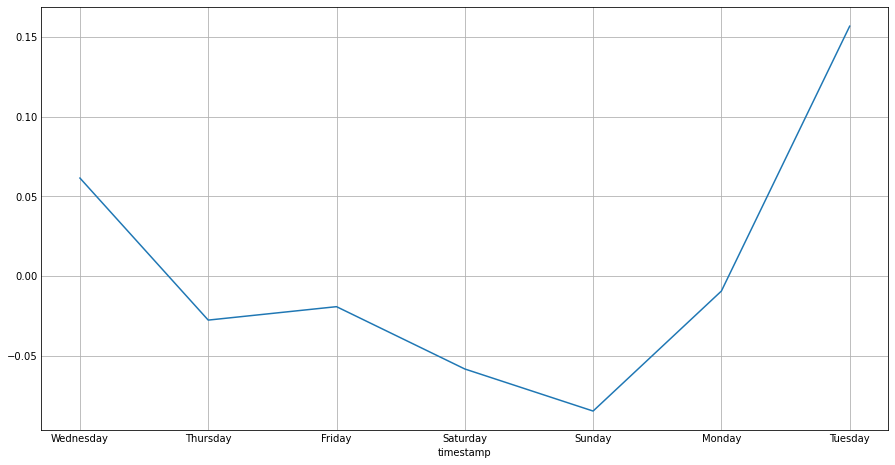

In [1028]:
week_order = ['Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday','Monday', 'Tuesday']
weekly_change = day_of_the_week.groupby(['timestamp']).mean().reindex(week_order).pct_change()
weekly_change.close.plot(figsize=(12,6))

In [1022]:
df
# weekly_change

,id,timestamp,open,close,high,low
1,"""achatemeow-selection-chest-3""",2022-05-06 15:00:00,4888.00,4888.00,4888.00,4888.00
2,"""achatemeow-selection-chest-3""",2022-05-06 16:00:00,4888.00,4823.33,4888.00,4823.33
3,"""achatemeow-selection-chest-3""",2022-05-06 17:00:00,4823.33,4758.67,4823.33,4758.67
4,"""achatemeow-selection-chest-3""",2022-05-06 18:00:00,4758.67,4694.00,4758.67,4694.00
5,"""achatemeow-selection-chest-3""",2022-05-06 19:00:00,4694.00,4629.33,4694.00,4629.33
...,...,...,...,...,...,...
2654003,"""fish-0""",2023-02-20 21:00:00,27.00,27.00,27.00,27.00
2654004,"""fish-0""",2023-02-20 22:00:00,27.00,27.00,27.00,27.00
2654005,"""fish-0""",2023-02-20 23:00:00,27.00,27.00,27.00,27.00
2654006,"""fish-0""",2023-02-21 00:00:00,27.00,27.00,27.00,27.00


### ar

In [1030]:
from statsmodels.tsa.stattools import adfuller

df_stattest = adfuller(one_item_parse.close, autolag='AIC')

In [1031]:
print(f'P-value: {df_stattest[1]}')

P-value: 0.005397717320922696


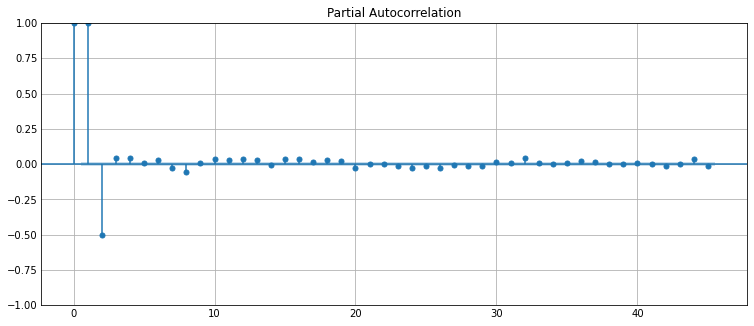

In [1042]:
from statsmodels.graphics.tsaplots import plot_pacf

with plt.rc_context():
    plt.rc("figure", figsize=(10,4))
    pacf = plot_pacf(one_item_parse.close,lags=45,method="ywm")

In [1052]:
last_week = -24*45
training_data = one_item_parse.close[:last_week]
test_data = one_item_parse.close[last_week:]

In [1053]:
ar_model = AutoReg(training_data,lags=45).fit()

C:\Users\saber\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [1054]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  close   No. Observations:                13620
Model:                    AutoReg(45)   Log Likelihood              -13459.654
Method:               Conditional MLE   S.D. of innovations              0.652
Date:                Tue, 21 Feb 2023   AIC                          27013.308
Time:                        23:20:54   BIC                          27366.560
Sample:                            45   HQIC                         27131.088
                                13620                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0335      0.011      2.953      0.003       0.011       0.056
close.L1       1.5069      0.009    175.593      0.000       1.490       1.524
close.L2      -0.5586      0.016    -36.012      0.0

In [1058]:
pred = ar_model.predict(start=len(training_data),end=(len(one_item_parse)-1),dynamic=False)

C:\Users\saber\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\saber\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


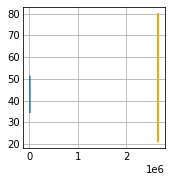

In [1059]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data,color='orange')

In [20]:
df.close[6000:last_week]

6003    22.00
6004    22.00
6005    22.00
6006    22.00
6007    22.00
        ...  
6883    41.67
6884    41.00
6885    40.33
6886    39.67
6887    39.00
Name: close, Length: 885, dtype: float64